In [ ]:
import os
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a directory to store the downloaded files
download_dir = "houston_2010_to_may2018"
os.makedirs(download_dir, exist_ok=True)

# Month abbreviations in order
months = ["jan", "feb", "mar", "apr", "may", "jun",
          "jul", "aug", "sep", "oct", "nov", "dec"]

# Create list of (month, year) tuples for Jan 2010 to May 2018
month_year_pairs = []
for year in range(2009, 2019):
    for month in months:
        if year == 2018 and month == "jun":
            break  # stop at May 2018
        if year == 2009 or year < 2018 or (year == 2018 and months.index(month) < 5 + 1):
            month_year_pairs.append((month, str(year)[2:]))

# Download and read files
all_dfs = []
for month, yy in month_year_pairs:
    filename = f"{month}{yy}.xls"
    url = f"https://www.houstontx.gov/police/cs/xls/{filename}"
    path = os.path.join(download_dir, filename)

    try:
        def download_file(url, path):
          print(f"Downloading {filename}...")
          response = requests.get(url)
          response.raise_for_status()
          with open(path, "wb") as f:
            f.write(response.content)
        # print(f"Downloading {filename}...")
        # response = requests.get(url)
        # response.raise_for_status()
        # with open(path, "wb") as f:
        #     f.write(response.content)
        try:
            download_file(url, path)
        except Exception as e:
            print(f"❌ Error downloading {filename}: {e}")
            tries = 5
            while tries > 0:
                print(f"Retrying {filename} in 5 seconds...")
                time.sleep(5)
                download_file(url, path)
                tries = tries - 1
            if tries == 0:
                print(f"❌ Failed to download {filename} after 5 tries.")
            continue
        # Read Excel into DataFrame
        df = pd.read_excel(path, engine='xlrd', dtype=str, header=0)
        df["month"] = month
        df["year"] = "20" + yy
        all_dfs.append(df)
    except Exception as e:
        print(f"❌ Error with {filename}: {e}")

# Combine all data into one DataFrame
combined_df = pd.concat(all_dfs, ignore_index=True)

# Save to a single CSV
combined_df.to_csv("houston_crime_jan2010_to_may2018.csv", index=False)

print("✅ Combined data saved to 'houston_crime_jan2010_to_may2018.csv'")


❌ Error downloading jan09.xls: 404 Client Error: Not Found for url: https://www.houstontx.gov/police/cs/xls/jan09.xls
Retrying jan09.xls in 5 seconds...
❌ Error with jan09.xls: name 'time' is not defined
❌ Error downloading feb09.xls: 404 Client Error: Not Found for url: https://www.houstontx.gov/police/cs/xls/feb09.xls
Retrying feb09.xls in 5 seconds...
❌ Error with feb09.xls: name 'time' is not defined
❌ Error downloading mar09.xls: 404 Client Error: Not Found for url: https://www.houstontx.gov/police/cs/xls/mar09.xls
Retrying mar09.xls in 5 seconds...
❌ Error with mar09.xls: name 'time' is not defined
❌ Error downloading apr09.xls: 404 Client Error: Not Found for url: https://www.houstontx.gov/police/cs/xls/apr09.xls
Retrying apr09.xls in 5 seconds...
❌ Error with apr09.xls: name 'time' is not defined
❌ Error downloading may09.xls: 404 Client Error: Not Found for url: https://www.houstontx.gov/police/cs/xls/may09.xls
Retrying may09.xls in 5 seconds...
❌ Error with may09.xls: name 't

In [ ]:
crime_data = pd.read_csv("/content/houston_crime_jan2010_to_may2018.csv") if combined_df.empty else combined_df.copy()

In [ ]:
#removing the unnamed columns
crime_data.drop(crime_data.columns[crime_data.columns.str.startswith('Unnamed')],inplace=True, axis=1)

In [ ]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141226 entries, 0 to 1141225
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Date           1014854 non-null  datetime64[ns]
 1   Hour           1141222 non-null  object        
 2   Offense Type   1141222 non-null  object        
 3   Beat           1141206 non-null  object        
 4   Premise        1107626 non-null  object        
 5   Block Range    806381 non-null   object        
 6   Street Name    806537 non-null   object        
 7   Type           1141222 non-null  object        
 8   Suffix         1141222 non-null  object        
 9   # Of Offenses  662242 non-null   object        
 10  month          1141226 non-null  object        
 11  year           1141226 non-null  object        
 12  Field11        0 non-null        object        
 13  # Of           7613 non-null     object        
 14  # Offenses     10319 non-null    o

<Axes: >

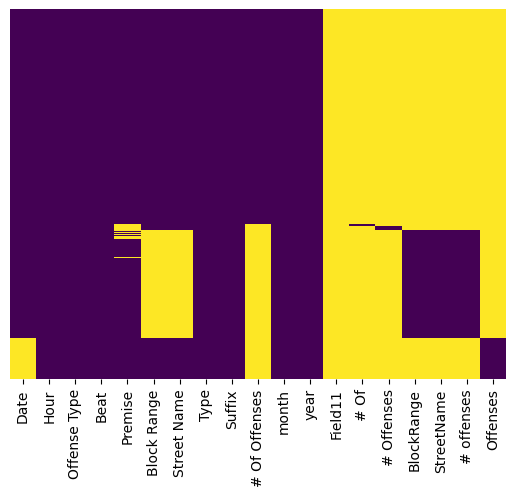

In [ ]:
sns.heatmap(crime_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [ ]:
##merging the street name into a single column
# crime_data[crime_data['Street Name'].isnull()][['Street Name']] =
# crime_data[['Street Name']].fillna(crime_data[~crime_data['StreetName'].isnull()][['StreetName']],inplace=True)

#Street Name from StreetName
crime_data['Street Name'].fillna(crime_data['StreetName'], inplace=True)
#Block Range from BlockRange
crime_data['Block Range'].fillna(crime_data['BlockRange'], inplace=True)

## Of Offenses from # Offenses
crime_data['# Of Offenses'].fillna(crime_data['# Offenses'], inplace=True)

## Of Offenses from # offenses
crime_data['# Of Offenses'].fillna(crime_data['# offenses'], inplace=True)

## Of Offenses from Offenses
crime_data['# Of Offenses'].fillna(crime_data['Offenses'], inplace=True)

## Of Offenses from
crime_data['# Of Offenses'].fillna(crime_data['# Of'], inplace=True)

<ipython-input-6-6f79da57bcbd>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_data['Street Name'].fillna(crime_data['StreetName'], inplace=True)
<ipython-input-6-6f79da57bcbd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
#dropping the unwanted columns
crime_data.drop(['Field11', '# Of', '# Offenses', 'BlockRange', 'StreetName','# offenses', 'Offenses','Suffix','year','month'],axis=1,inplace=True)

#renaming the crimedatacolumns to match the standard
crime_data.rename(columns={'Date':'Occurrence Date', 'Hour':'Occurrence Hour', 'Offense Type':'NIBRS Description',
       'Type':'Street Type', '# Of Offenses':'Offense Count'},inplace=True)

# dropping the records with missing values
crime_data = crime_data[~crime_data['Occurrence Date'].isnull()]
crime_data = crime_data[~crime_data['Premise'].isnull()]

<h3 style="color:'red'">June to Dec crime data</h3>

In [ ]:
june_dec_2018_crime_data = pd.read_excel("/content/2018-june-december.xlsx")
june_dec_2018_crime_data.head(5)

,Occurrence Date,Unnamed: 1,Occurrence Hour,Unnamed: 3,NIBRS Description,Unnamed: 5,Offense Count,Beat,Premise,Block Range,Unnamed: 10,Street Name,Unnamed: 12,Unnamed: 13,Street Type,Unnamed: 15,Suffix
0,2018-06-01,NaN,0,NaN,Simple assault,NaN,2,20G40,"Residence, Home (Includes Apartment)",2500-2599,NaN,WOODLAND PARK,NaN,NaN,DR,NaN,NaN
1,2018-06-01,NaN,3,NaN,Simple assault,NaN,2,18F30,"Residence, Home (Includes Apartment)",6400-6499,NaN,WESTHEIMER,NaN,NaN,RD,NaN,NaN
2,2018-06-01,NaN,5,NaN,Simple assault,NaN,2,10H70,"Hotel, Motel, ETC",5700-5799,NaN,MAIN,NaN,NaN,ST,NaN,NaN
3,2018-06-01,NaN,6,NaN,Intimidation,NaN,2,9C20,Industrial Site,400-499,NaN,WAYSIDE,NaN,NaN,DR,NaN,N
4,2018-06-01,NaN,7,NaN,Simple assault,NaN,2,11H10,"Residence, Home (Includes Apartment)",NaN,NaN,2 AVENUE I,NaN,NaN,NaN,NaN,NaN


In [ ]:
#removing the unnamed columns
june_dec_2018_crime_data.drop(june_dec_2018_crime_data.columns[june_dec_2018_crime_data.columns.str.startswith('Unnamed')],inplace=True, axis=1)

june_dec_2018_crime_data.drop(['Suffix'],axis=1,inplace=True)

<Axes: >

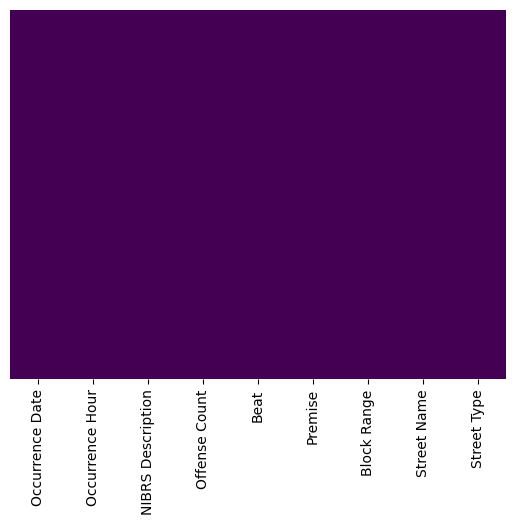

In [ ]:
sns.heatmap(june_dec_2018_crime_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [ ]:
crime_data_2010_18 = pd.concat([crime_data,june_dec_2018_crime_data],axis=0,ignore_index=True)
crime_data_2010_18.head()

,Occurrence Date,Occurrence Hour,NIBRS Description,Beat,Premise,Block Range,Street Name,Street Type,Offense Count
0,2009-06-24 00:00:00,14,Murder,18F40,18A,2900-2999,CROSSVIEW,DR,1
1,2009-06-24 00:00:00,10,Murder,16E20,20R,4800-4899,MACRIDGE,BLVD,1
2,2009-06-23 00:00:00,21,Murder,17E10,18T,6700-6799,HILLCROFT,-,1
3,2009-06-08 00:00:00,00,Murder,3B40,11R,900-999,40TH 1/2,ST,1
4,2009-06-03 00:00:00,23,Murder,9C30,20R,3900-3999,MANITOU,DR,1


## Crime Data from 2019 to 2024

In [ ]:
df_2019_24 = pd.read_csv("/content/houston_nibrs_2019_2024_combined.csv")
df_2019_24.head(5)

<ipython-input-30-8649d7a0d10f>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019_24 = pd.read_csv("/content/houston_nibrs_2019_2024_combined.csv")


,incident,rmsoccurrencedate,rmsoccurrencehour,nibrsclass,nibrsdescription,offensecount,beat,premise,streetno,streetname,streettype,suffix,city,zipcode,maplongitude,maplatitude,year
0,5619,2019-01-01,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",9622,SAN CARLOS,NaN,NaN,HOUSTON,77013,-95.258222,29.796918,2019
1,17319,2019-01-01,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",NaN,EAST,FWY,NaN,HOUSTON,77020,-95.315170,29.774653,2019
2,17319,2019-01-01,0,90D,Driving under the influence,1,7C10,"Highway, Road, Street, Alley",NaN,EAST,FWY,NaN,HOUSTON,77020,-95.315170,29.774653,2019
3,18119,2019-01-01,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",16718,LONE QUAIL,CT,NaN,HOUSTON,77489,-95.512372,29.583499,2019
4,19019,2019-01-01,0,520,Weapon law violations,1,NaN,"Residence, Home (Includes Apartment)",1909,MELBOURNE,NaN,NaN,HOUSTON,77026-0000,-95.349516,29.816864,2019


<Axes: >

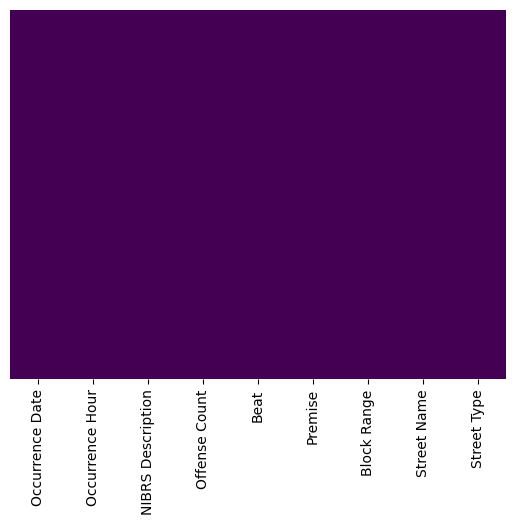

In [ ]:
sns.heatmap(df_2019_24.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [ ]:
#dropping unnecesary columns
df_2019_24.drop(['incident','nibrsclass','city','zipcode','maplongitude','maplatitude', 'year','suffix'],axis=1,inplace=True)

# df_2019_24.drop(['incident','nibrsclass','streetno','city','zipcode','maplongitude','maplatitude', 'year','suffix'],axis=1,inplace=True)
df_2019_24.dropna(inplace=True)
df_2019_24.rename(columns={'rmsoccurrencedate':'Occurrence Date', 'rmsoccurrencehour':'Occurrence Hour', 'nibrsdescription':'NIBRS Description',
       'offensecount':'Offense Count', 'beat':'Beat', 'premise':'Premise',
       'streetno':'Block Range', 'streetname':'Street Name',
       'streettype':'Street Type'},inplace=True)
df_2019_24.head()

,Occurrence Date,Occurrence Hour,NIBRS Description,Offense Count,Beat,Premise,Block Range,Street Name,Street Type
3,2019-01-01,0,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",16718,LONE QUAIL,CT
6,2019-01-01,0,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR
7,2019-01-01,0,All other larceny,1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR
8,2019-01-01,0,"Destruction, damage, vandalism",1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR
9,2019-01-01,0,"Drug, narcotic violations",1,15E30,"Residence, Home (Includes Apartment)",4034,OSBY,DR


## Concatinating the crime data from 2010 to 2024

In [ ]:
crime_data_2010_24 = pd.concat([crime_data_2010_18,df_2019_24],axis=0,ignore_index=True)
crime_data_2010_24.head()

,Occurrence Date,Occurrence Hour,NIBRS Description,Beat,Premise,Block Range,Street Name,Street Type,Offense Count
0,2009-06-24,14,Murder,18F40,18A,2900-2999,CROSSVIEW,DR,1
1,2009-06-24,10,Murder,16E20,20R,4800-4899,MACRIDGE,BLVD,1
2,2009-06-23,21,Murder,17E10,18T,6700-6799,HILLCROFT,-,1
3,2009-06-08,00,Murder,3B40,11R,900-999,40TH 1/2,ST,1
4,2009-06-03,23,Murder,9C30,20R,3900-3999,MANITOU,DR,1


In [ ]:
crime_data_2010_24.to_csv("houston_crime_2010_2024.csv",index=False)

In [ ]:
df[(df['Occurrence Date'].dt.year>=2024) & (df['Occurrence Date'].dt.year<=2024)]

,Occurrence Date,Occurrence Hour,NIBRS Description,Beat,Premise,Block Range,Street Name,Street Type,Offense Count,year,month,weekday,hour_group
2270877,2024-01-01,0,Disorderly conduct,8C30,"Residence, Home (Includes Apartment)",8404,EASTOVER,ST,1,2024,1,0,0
2270878,2024-01-01,0,Disorderly conduct,8C10,"Residence, Home (Includes Apartment)",7125,GLASS,ST,1,2024,1,0,0
2270879,2024-01-01,0,Aggravated Assault,6B10,"Residence, Home (Includes Apartment)",329,INNSDALE,DR,1,2024,1,0,0
2270880,2024-01-01,0,Weapon law violations,16E20,"Residence, Home (Includes Apartment)",3727,DALMATIAN,DR,1,2024,1,0,0
2270881,2024-01-01,0,Aggravated Assault,1A20,"Parking Lot, Garage",230,ALABAMA,ST,1,2024,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501831,2024-12-31,23,Simple assault,5F20,"Residence, Home (Includes Apartment)",1514,BINGLE,RD,1,2024,12,1,3
2501832,2024-12-31,23,Disorderly conduct,3B40,"Residence, Home (Includes Apartment)",701,VICTORIA,DR,1,2024,12,1,3
2501833,2024-12-31,23,Drug,3B40,"Residence, Home (Includes Apartment)",701,VICTORIA,DR,1,2024,12,1,3
2501833,2024-12-31,23,narcotic violations,3B40,"Residence, Home (Includes Apartment)",701,VICTORIA,DR,1,2024,12,1,3


[0.0s] Loading dataset...houston_crime_2010_2024.csv
[5.52s] Cleaning and expanding NIBRS Description...
[18.75s] Splitting dataset into train/test and equal sampling from least frequent classes...


<ipython-input-13-026193f7a163>:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(min(len(x), n), random_state=42)).reset_index(drop=True)
<ipython-input-13-026193f7a163>:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(min(len(x), n), random_state=42)).reset_index

[19.92s] train df:(100000, 13)
test df:(86055, 13)
[19.92s] Setting up preprocessing pipeline...
[19.92s] Initializing models...
[19.92s] Starting model training and evaluation...

\Training Logistic Regression...

Classification Report:
                          precision    recall  f1-score   support

      Aggravated Assault       0.24      0.06      0.10     10000
                Burglary       0.54      0.16      0.24     10000
             Destruction       0.00      0.00      0.00     10000
            Intimidation       0.19      0.49      0.27     10000
                 Robbery       0.22      0.19      0.21      6055
          Simple assault       0.18      0.38      0.24     10000
                   Theft       0.00      0.00      0.00         0
Theft from motor vehicle       0.31      0.69      0.43     10000
                  damage       0.13      0.08      0.10     10000
               vandalism       0.00      0.00      0.00     10000

                accuracy          

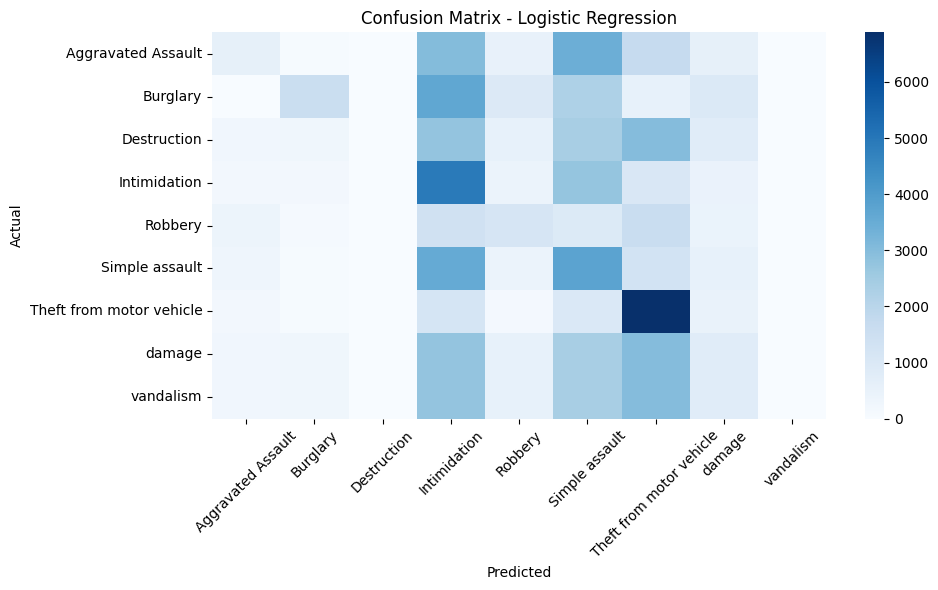


\Training Random Forest...

Classification Report:
                          precision    recall  f1-score   support

      Aggravated Assault       0.16      0.11      0.13     10000
                Burglary       0.41      0.26      0.32     10000
             Destruction       0.12      0.05      0.07     10000
            Intimidation       0.17      0.33      0.23     10000
                 Robbery       0.18      0.17      0.17      6055
          Simple assault       0.16      0.28      0.20     10000
                   Theft       0.00      0.00      0.00         0
Theft from motor vehicle       0.30      0.56      0.39     10000
                  damage       0.12      0.05      0.07     10000
               vandalism       0.12      0.05      0.07     10000

                accuracy                           0.21     86055
               macro avg       0.17      0.18      0.16     86055
            weighted avg       0.20      0.21      0.18     86055



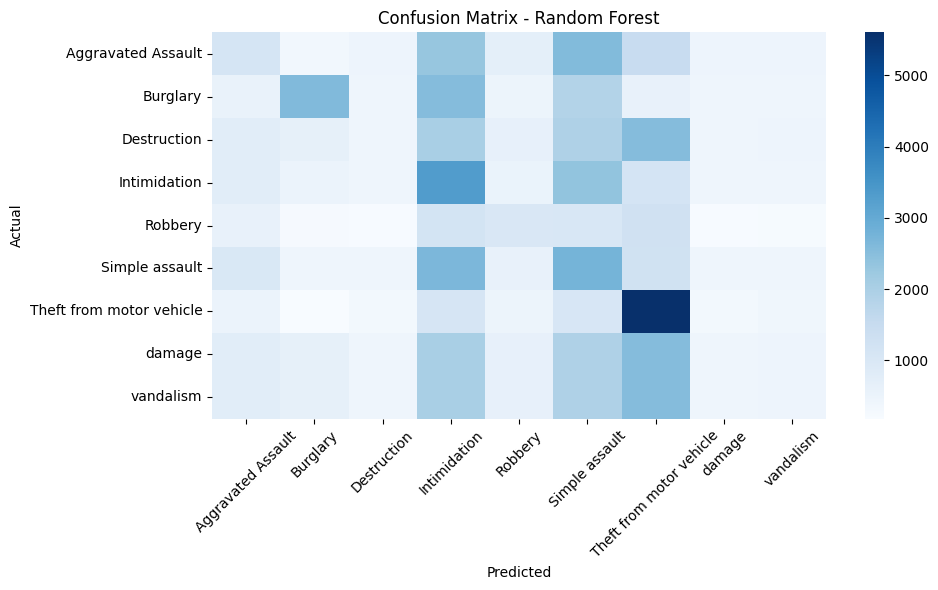


\Training K-Nearest Neighbors...

Classification Report:
                          precision    recall  f1-score   support

      Aggravated Assault       0.13      0.15      0.14     10000
                Burglary       0.29      0.10      0.15     10000
             Destruction       0.12      0.08      0.09     10000
            Intimidation       0.15      0.10      0.12     10000
                 Robbery       0.12      0.16      0.13      6055
          Simple assault       0.14      0.26      0.18     10000
                   Theft       0.00      0.00      0.00         0
Theft from motor vehicle       0.29      0.09      0.14     10000
                  damage       0.12      0.20      0.15     10000
               vandalism       0.12      0.13      0.13     10000

                accuracy                           0.14     86055
               macro avg       0.15      0.13      0.12     86055
            weighted avg       0.17      0.14      0.14     86055



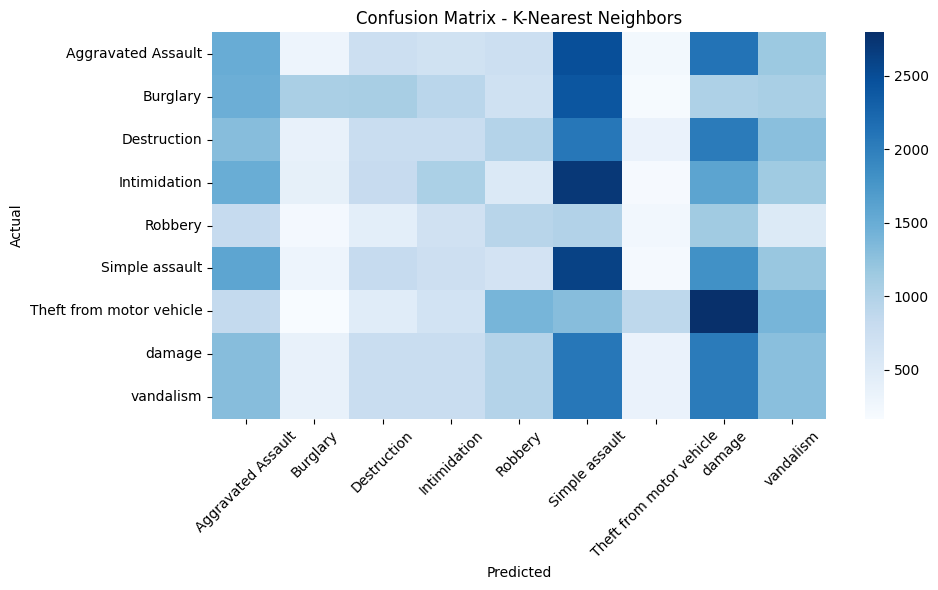

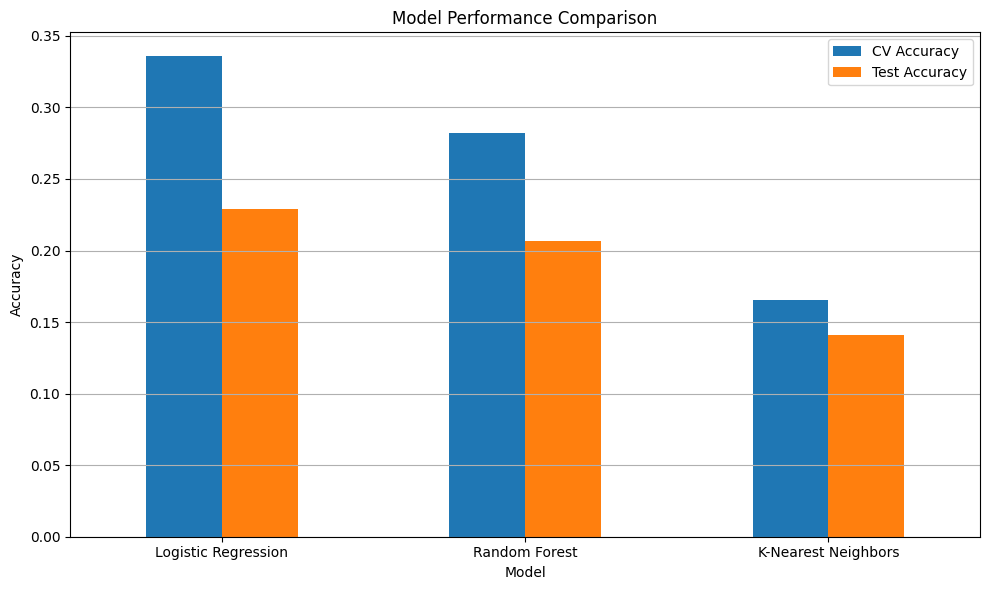


Final Model Comparison:
                 Model  CV Accuracy  Test Accuracy  Macro AUC
0  Logistic Regression       0.3357         0.2293        NaN
1        Random Forest       0.2821         0.2070        NaN
2  K-Nearest Neighbors       0.1652         0.1411        NaN


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Start timer
def log_step(message):
    elapsed = round(time.time() - start_time, 2)
    print(f"[{elapsed}s] {message}")

start_time = time.time()

# Step 1: Load and clean
filename = "houston_crime_2010_2024.csv"
log_step(f"Loading dataset...{filename}")
df = pd.read_csv(filename, low_memory=False, dtype={"Occurrence Hour": str})
df.columns = df.columns.str.strip()
df = df.dropna(subset=["NIBRS Description", "Occurrence Date", "Premise"])
df["Occurrence Date"] = pd.to_datetime(df["Occurrence Date"], errors="coerce")
df = df.dropna(subset=["Occurrence Date"])

# Expand multi-label descriptions
log_step("Cleaning and expanding NIBRS Description...")
df["NIBRS Description"] = df["NIBRS Description"].astype(str).str.replace(r"[\n\r\t]+", ",", regex=True)
df["NIBRS Description"] = df["NIBRS Description"].str.split(",")
df = df.explode("NIBRS Description")
df["NIBRS Description"] = df["NIBRS Description"].str.strip()
df = df[(df["NIBRS Description"] != "") & (df["NIBRS Description"] != "1")]

# Step 2: Select bottom N classes based on frequency and balance samples
top_n = 10
most_common = df["NIBRS Description"].value_counts(ascending=False).head(top_n)

#setting the sample size per class
#n_samples_per_class = most_common.min() #for making sure equal number of sample exists in each class for model building to mitigate the bias
n_samples_per_class = 10000

filtered_df = df[df["NIBRS Description"].isin(most_common.index)].copy()

# Feature engineering
filtered_df["year"] = filtered_df["Occurrence Date"].dt.year
filtered_df["month"] = filtered_df["Occurrence Date"].dt.month
filtered_df["weekday"] = filtered_df["Occurrence Date"].dt.weekday
filtered_df["hour_group"] = pd.to_numeric(filtered_df["Occurrence Hour"], errors="coerce") // 6

# Step 3: Train/Test split by year
log_step("Splitting dataset into train/test and equal sampling from least frequent classes...")
train_df = filtered_df[filtered_df["year"].between(2010, 2023)].copy()
test_df = filtered_df[filtered_df["year"] == 2024].copy()

# Balance the samples per class
def stratified_sample(df, label_col, n):
    return df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(min(len(x), n), random_state=42)).reset_index(drop=True)


train_df = stratified_sample(train_df, "NIBRS Description", n_samples_per_class)
test_df = stratified_sample(test_df, "NIBRS Description", n_samples_per_class)

log_step(f'train df:{train_df.shape}\ntest df:{test_df.shape}')

features = ["Beat", "Premise", "month", "weekday", "hour_group"]
target = "NIBRS Description"

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Step 4: Preprocessing pipeline
log_step("Setting up preprocessing pipeline...")
categorical_features = features
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("cat", categorical_transformer, categorical_features)
])

# Step 5: Model setup
log_step("Initializing models...")
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=25),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 6: Train and evaluate
results = {}
log_step("Starting model training and evaluation...")
for name, model in models.items():
    print(f"\n\Training {name}...")
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    cv_score = cross_val_score(pipe, X_train, y_train, cv=cv_strategy, scoring="accuracy").mean()
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    le = LabelEncoder()
    y_test_enc = le.fit_transform(y_test)
    y_pred_proba = pipe.predict_proba(X_test)
    if y_pred_proba.shape[1] == len(np.unique(y_test_enc)):
        auc = roc_auc_score(y_test_enc, y_pred_proba, multi_class="ovr", average="macro")
    else:
        auc = np.nan

    results[name] = {
        "CV Accuracy": round(cv_score, 4),
        "Test Accuracy": round(acc, 4),
        "Macro AUC": round(auc, 4)
    }

# Step 7: Final result plot
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})
results_df.set_index("Model")[["CV Accuracy", "Test Accuracy"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\nFinal Model Comparison:")
print(results_df)


In [ ]:
df[(df['Occurrence Date'].dt.year>=2024) & (df['Occurrence Date'].dt.year<=2025)]['NIBRS Description'].value_counts(ascending=False).head()

,count
NIBRS Description,
Theft from motor vehicle,24801
Simple assault,23155
damage,20089
vandalism,20089
Destruction,20089


[0.0s] Loading dataset...houston_crime_2010_2024.csv
[5.7s] Cleaning and expanding NIBRS Description...
[17.93s] Splitting dataset into train/test and equal sampling from least frequent classes...


<ipython-input-11-9877386cfe31>:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(min(len(x), n), random_state=42)).reset_index(drop=True)
<ipython-input-11-9877386cfe31>:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(min(len(x), n), random_state=42)).reset_index

NIBRS Description
Destruction                 20000
Simple assault              20000
Theft from motor vehicle    20000
damage                      20000
vandalism                   20000
Name: count, dtype: int64
NIBRS Description
Destruction                 20000
Simple assault              20000
Theft from motor vehicle    20000
damage                      20000
vandalism                   20000
Name: count, dtype: int64
[18.47s] train df:(100000, 13)
test df:(100000, 13)
[18.59s] Setting up preprocessing pipeline...
[18.59s] Initializing models...
[18.59s] Starting model training and evaluation...
Training Neural Network...

Classification Report:
                          precision    recall  f1-score   support

             Destruction       0.23      0.09      0.13     20000
          Simple assault       0.29      0.51      0.37     20000
Theft from motor vehicle       0.38      0.59      0.46     20000
                  damage       0.29      0.00      0.00     20000
         

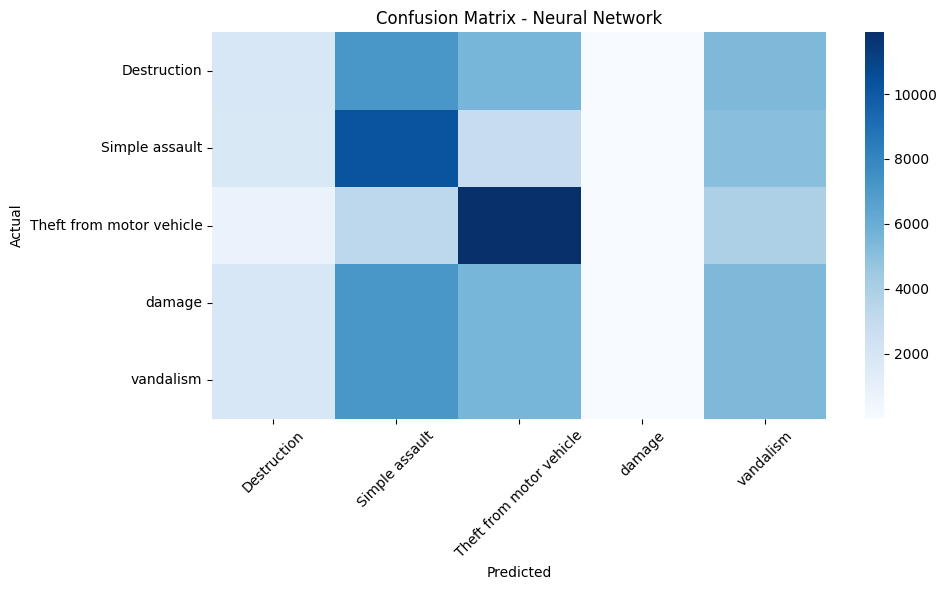

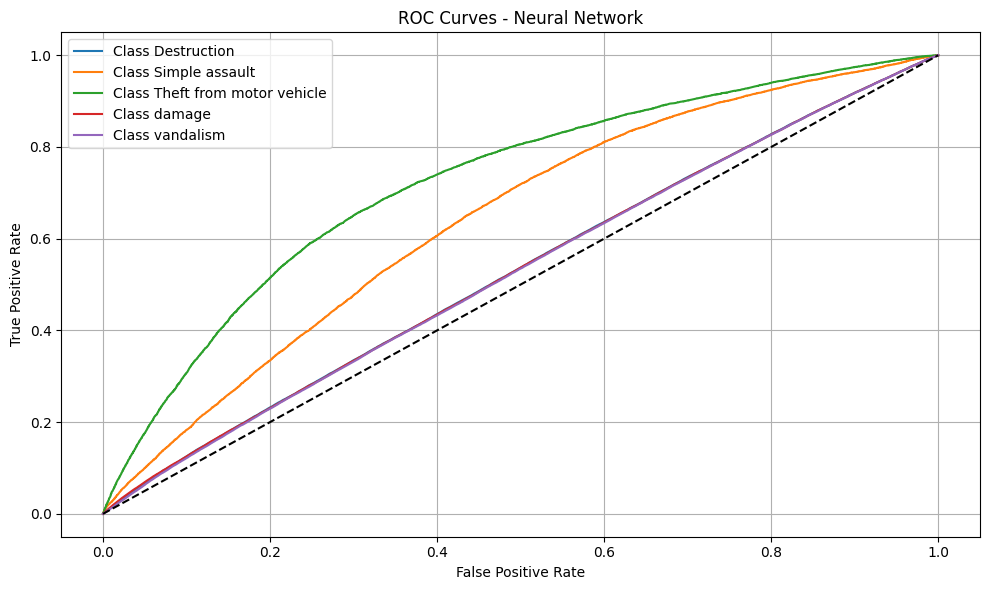

Training Random Forest...

Classification Report:
                          precision    recall  f1-score   support

             Destruction       0.22      0.10      0.14     20000
          Simple assault       0.28      0.55      0.37     20000
Theft from motor vehicle       0.35      0.62      0.45     20000
                  damage       0.22      0.09      0.13     20000
               vandalism       0.22      0.09      0.13     20000

                accuracy                           0.29    100000
               macro avg       0.26      0.29      0.24    100000
            weighted avg       0.26      0.29      0.24    100000



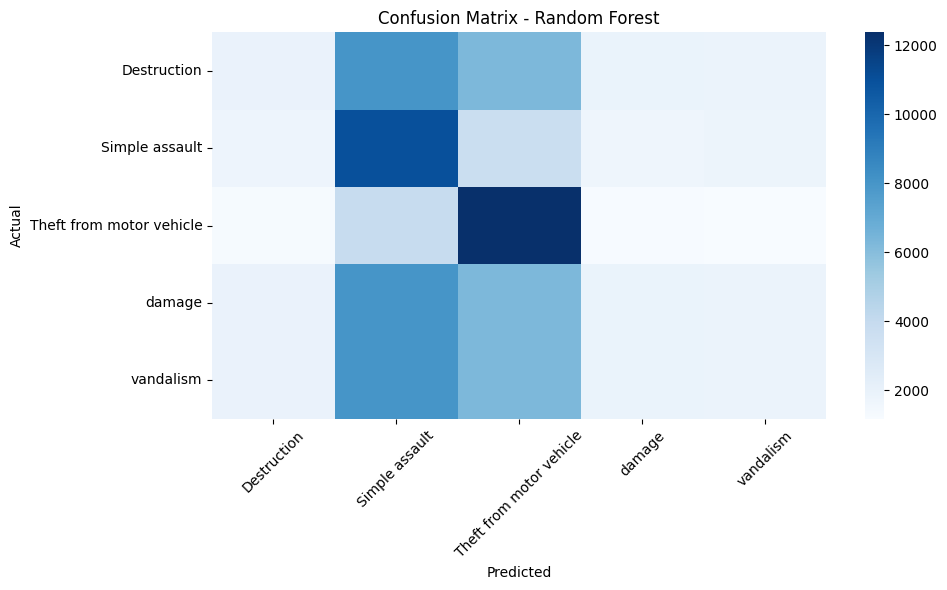

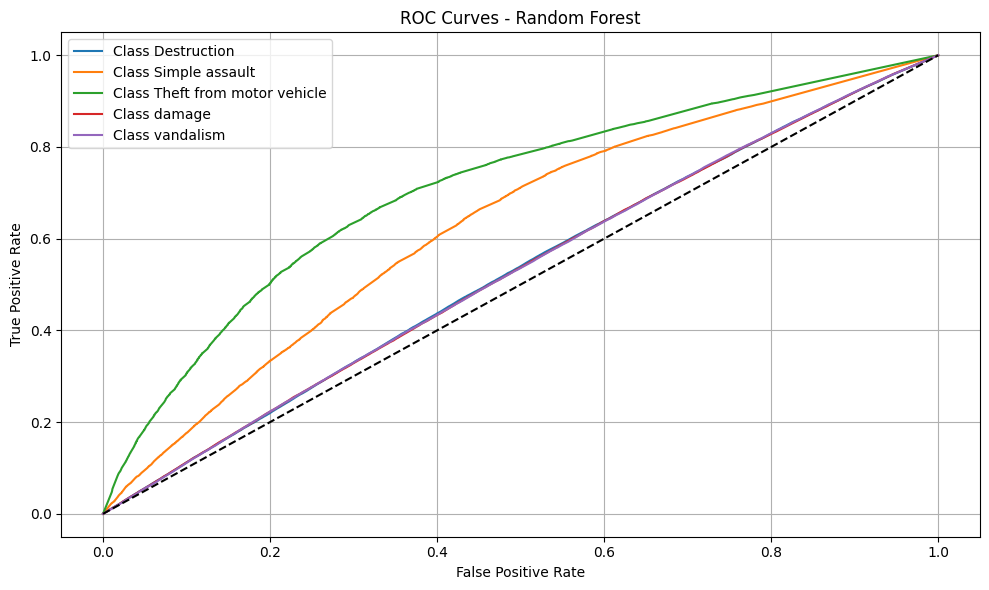

Training K-Nearest Neighbors...

Classification Report:
                          precision    recall  f1-score   support

             Destruction       0.21      0.22      0.21     20000
          Simple assault       0.29      0.22      0.25     20000
Theft from motor vehicle       0.31      0.35      0.33     20000
                  damage       0.21      0.12      0.16     20000
               vandalism       0.20      0.30      0.24     20000

                accuracy                           0.24    100000
               macro avg       0.24      0.24      0.24    100000
            weighted avg       0.24      0.24      0.24    100000



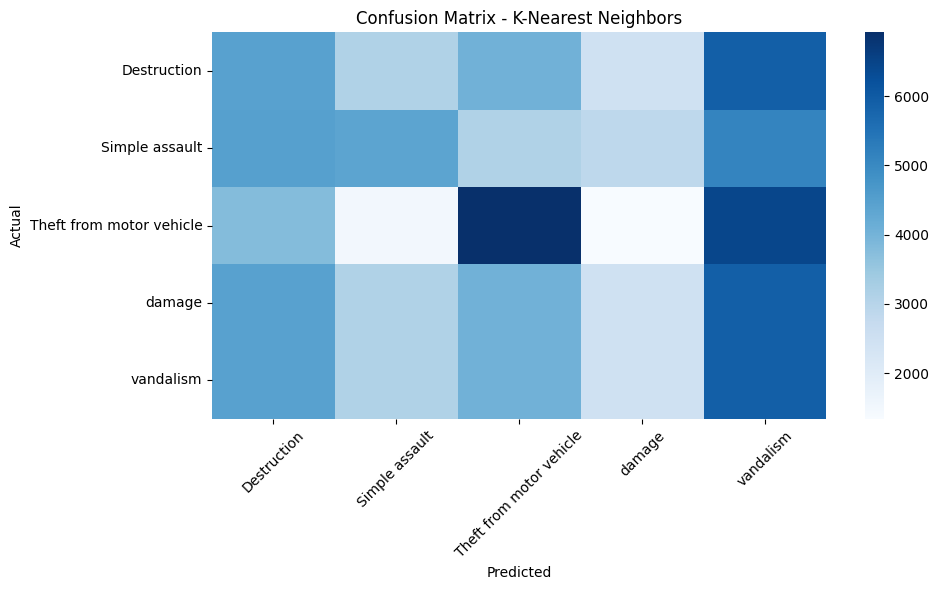

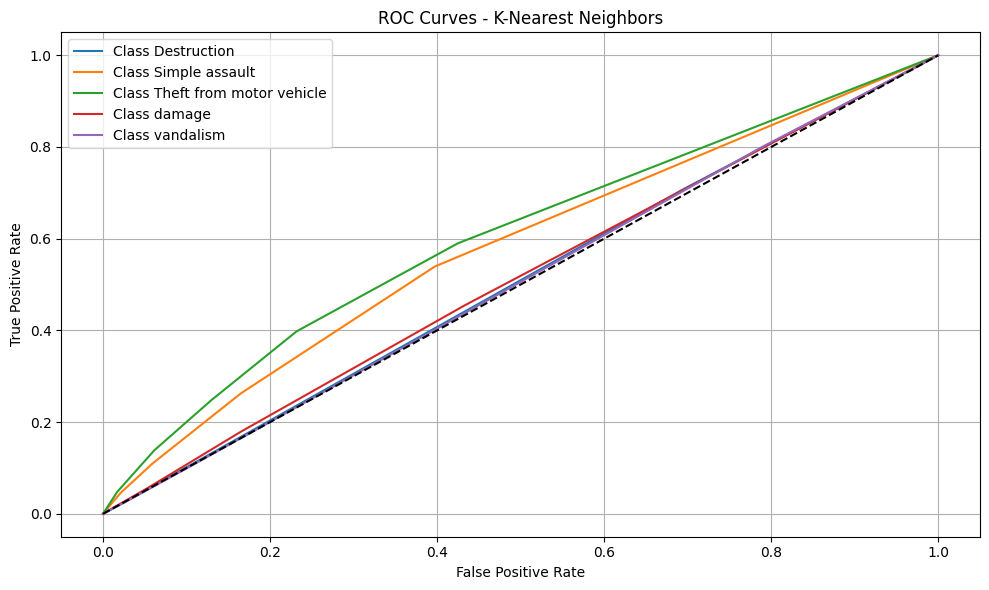

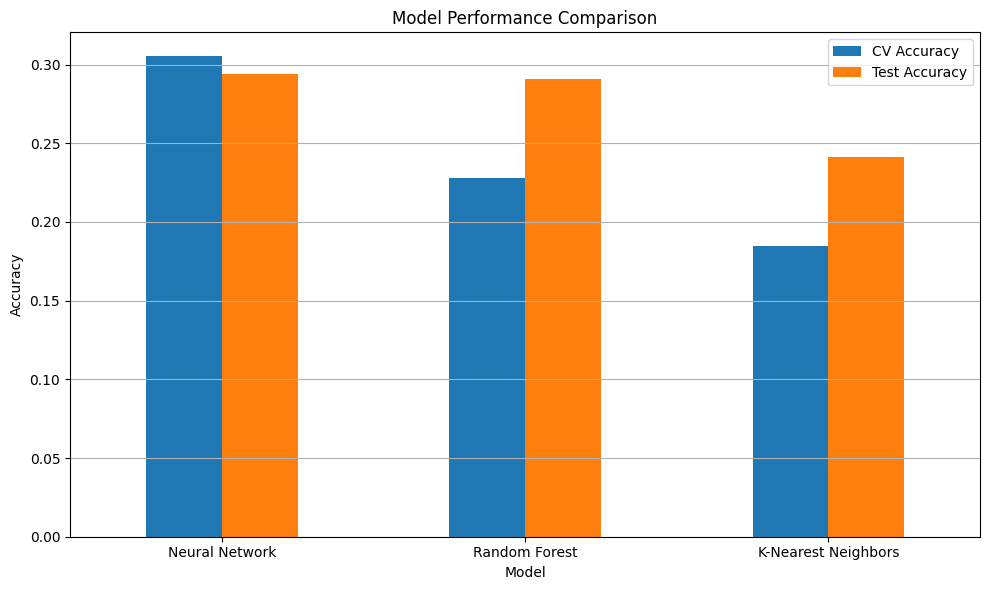


Final Model Comparison:
                 Model  CV Accuracy  Test Accuracy  Macro AUC
0       Neural Network       0.3052         0.2937     0.5895
1        Random Forest       0.2279         0.2911     0.5835
2  K-Nearest Neighbors       0.1848         0.2414     0.5412


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier

# Start timer
def log_step(message):
    elapsed = round(time.time() - start_time, 2)
    print(f"[{elapsed}s] {message}")

start_time = time.time()

# Step 1: Load and clean
filename = "houston_crime_2010_2024.csv"
log_step(f"Loading dataset...{filename}")
df = pd.read_csv(filename, low_memory=False, dtype={"Occurrence Hour": str})
df.columns = df.columns.str.strip()
df = df.dropna(subset=["NIBRS Description", "Occurrence Date", "Premise"])
df["Occurrence Date"] = pd.to_datetime(df["Occurrence Date"], errors="coerce")
df = df.dropna(subset=["Occurrence Date"])

# Expand multi-label descriptions
log_step("Cleaning and expanding NIBRS Description...")
df["NIBRS Description"] = df["NIBRS Description"].astype(str).str.replace(r"[\n\r\t]+", ",", regex=True)
df["NIBRS Description"] = df["NIBRS Description"].str.split(",")
df = df.explode("NIBRS Description")
df["NIBRS Description"] = df["NIBRS Description"].str.strip()
df = df[(df["NIBRS Description"] != "") & (df["NIBRS Description"] != "1")]

# Step 2: Select bottom N classes based on frequency and balance samples
top_n = 5
most_common_2024 = df[df['Occurrence Date'].dt.year>=2024]['NIBRS Description'].value_counts(ascending=False).head(5).index
# most_common = df["NIBRS Description"].value_counts(ascending=False).head(top_n).index
filtered_df = df[df["NIBRS Description"].isin(most_common_2024)].copy()

# Feature engineering
filtered_df["year"] = filtered_df["Occurrence Date"].dt.year
filtered_df["month"] = filtered_df["Occurrence Date"].dt.month
filtered_df["weekday"] = filtered_df["Occurrence Date"].dt.weekday
filtered_df["hour_group"] = pd.to_numeric(filtered_df["Occurrence Hour"], errors="coerce") // 6

# Step 3: Train/Test split by year
log_step("Splitting dataset into train/test and equal sampling from least frequent classes...")
train_df = filtered_df[filtered_df["year"].between(2010, 2023)].copy()
test_df = filtered_df[filtered_df["year"] == 2024].copy()

# Balance the samples per class
def stratified_sample(df, label_col, n):
    return df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(min(len(x), n), random_state=42)).reset_index(drop=True)

n_samples_per_class = 20000
train_df = stratified_sample(train_df, "NIBRS Description", n_samples_per_class)
test_df = stratified_sample(test_df, "NIBRS Description", n_samples_per_class)

#test
print(train_df["NIBRS Description"].value_counts())
print(test_df["NIBRS Description"].value_counts())

log_step(f'train df:{train_df.shape}\ntest df:{test_df.shape}')

features = ["Beat", "Premise", "month", "weekday", "hour_group"]
target = "NIBRS Description"

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Encode labels before training
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
y_test_bin = label_binarize(y_test_enc, classes=range(len(le.classes_)))

# Step 4: Preprocessing pipeline
log_step("Setting up preprocessing pipeline...")
categorical_features = features
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("cat", categorical_transformer, categorical_features)
])

# Step 5: Model setup
log_step("Initializing models...")
models = {
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=25),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 6: Train and evaluate
results = {}
log_step("Starting model training and evaluation...")

for name, model in models.items():
    print(f"Training {name}...")
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    cv_score = cross_val_score(pipe, X_train, y_train_enc, cv=cv_strategy, scoring="accuracy").mean()
    pipe.fit(X_train, y_train_enc)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test_enc, y_pred)

    print("\nClassification Report:")
    print(classification_report(le.inverse_transform(y_test_enc), le.inverse_transform(y_pred), zero_division=0))

    cm = confusion_matrix(le.inverse_transform(y_test_enc), le.inverse_transform(y_pred), labels=le.classes_)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    try:
        y_pred_proba = pipe.predict_proba(X_test)
        if y_pred_proba.shape[1] == len(le.classes_):
            auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class="ovr", average="macro")

            plt.figure(figsize=(10, 6))
            for i in range(len(le.classes_)):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
                plt.plot(fpr, tpr, label=f"Class {le.classes_[i]}")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"ROC Curves - {name}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            auc = np.nan
    except:
        auc = np.nan

    results[name] = {
        "CV Accuracy": round(cv_score, 4),
        "Test Accuracy": round(acc, 4),
        "Macro AUC": round(auc, 4)
    }

# Step 7: Final result plot
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})
results_df.set_index("Model")[["CV Accuracy", "Test Accuracy"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("\nFinal Model Comparison:")
print(results_df)
